In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
art_styles = ["rococo", "realism", "surrealism", "baroque", "neoclassicism"]

## Images classification with Image Flattening

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import svm
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

1. Load each image, flatten it into a 1D array, and store it along with its corresponding label.
2. Create separate lists or arrays for flattened images and labels.

In [ ]:
from skimage import io
from skimage.transform import resize
from skimage.color import rgb2gray
import numpy as np
import os

def load_images_from_folder(folder):
    images = []
    labels = []
    for label, class_name in enumerate(os.listdir(folder)):
        class_path = os.path.join(folder, class_name)
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = io.imread(img_path)
            img = resize(img, (128, 128, 3))  # Resize images to a consistent size
            img = rgb2gray(img)  # Convert to grayscale
            images.append(img.flatten())  # Flatten the image into a 1D array
            labels.append(label)  # Assign label based on the class folder
    return np.array(images), np.array(labels)


train_data, train_labels = load_images_from_folder('/content/drive/MyDrive/MachineLearning/Data/train')
test_data, test_labels = load_images_from_folder('/content/drive/MyDrive/MachineLearning/Data/test')

In [ ]:
print("Train Labels Shape:", train_labels.shape)
print("Test Labels Shape:", test_labels.shape)

In [ ]:
import matplotlib.pyplot as plt

def cross_validation(estimator):
    _, train_scores, test_scores = learning_curve(estimator, train_data, train_labels, cv=10, n_jobs=-1, train_sizes=[1.0, ], scoring="accuracy")
    test_scores = test_scores[0]
    mean, std = test_scores.mean(), test_scores.std()
    return mean, std

def plot(title, xlabel, X, Y, error, ylabel = "Accuracy"):
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid()
    plt.ylabel(ylabel)

    plt.errorbar(X, Y, error, linestyle='None', marker='o')

### Support Vector Machine
1. Thay đổi kernel, và lựa chọn C = 1 để tìm ra kernel tối ưu  
2. Lựa chọn kernel có accuracy cao nhất, thay đổi C để tìm ra C tối ưu

100%|██████████| 4/4 [13:39<00:00, 204.77s/it]


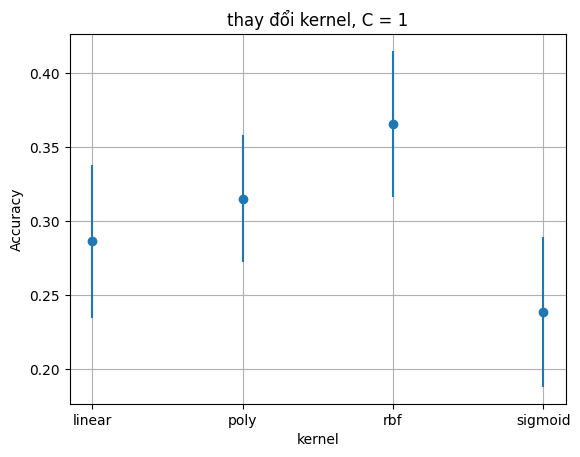

In [ ]:
title = "thay đổi kernel, C = 1"
xlabel = "kernel"
X = []
Y = []
error = []

for kernel in tqdm(['linear', 'poly', 'rbf', 'sigmoid']):
    # Với mỗi kernel được chọn,
    # thực hiện xây dựng mô hình, huấn luyện và đánh giá theo cross-validation
    svm_clf = svm.SVC(kernel=kernel, C=1.0)
    mean, std = cross_validation(svm_clf)
    X.append(kernel)
    Y.append(mean)
    error.append(std)

# lưu kết quả ra file ảnh
plot(title, xlabel, X, Y, error)
plt.savefig('/content/drive/MyDrive/MachineLearning/Images/svm_change_kernel.png', bbox_inches='tight')
plt.show()

100%|██████████| 5/5 [21:14<00:00, 254.88s/it]


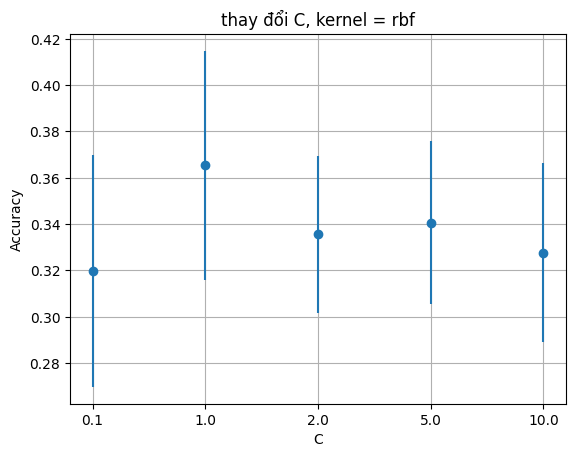

In [ ]:
# đoạn này duy chạy hộ tớ thì xem ở trên cái kernel nào accuracy cao nhất thì thay kernel ở dưới nhé
title = "thay đổi C, kernel = rbf" # thay ở đây
xlabel = "C"
X = []
Y = []
error = []

for C in tqdm([.1, 1.0, 2.0, 5.0, 10.0]):
    # Với từng giá trị C nhận được,
    # thực hiện xây dựng mô hình, huấn luyện và đánh giá theo cross-validation
    svm_clf = svm.SVC(kernel='rbf', C=C) # thay ở đây
    mean, std = cross_validation(svm_clf)
    X.append(str(C))
    Y.append(mean)
    error.append(std)

# lưu kết quả ra file ảnh
plot(title, xlabel, X, Y, error)
plt.savefig('/content/drive/MyDrive/MachineLearning/Images/svm_change_C.png', bbox_inches='tight')
plt.show()


In [ ]:
# kết quả ở đây sẽ được dùng để lưu trong bảng báo cáo. duy chạy thì thay cái kernel tốt nhất và c tốt nhất vào nhé
_svm_clf = svm.SVC(kernel='rbf', C=1.0)
_svm_clf.fit(train_data, train_labels)
# result of prediction on test set
print(f'SVM: {accuracy_score(test_labels, _svm_clf.predict(test_data))}')

SVM: 0.165


### Random Forest
1. Thay đổi criterion
2. Thay đổi số estimators

100%|██████████| 2/2 [01:40<00:00, 50.43s/it]


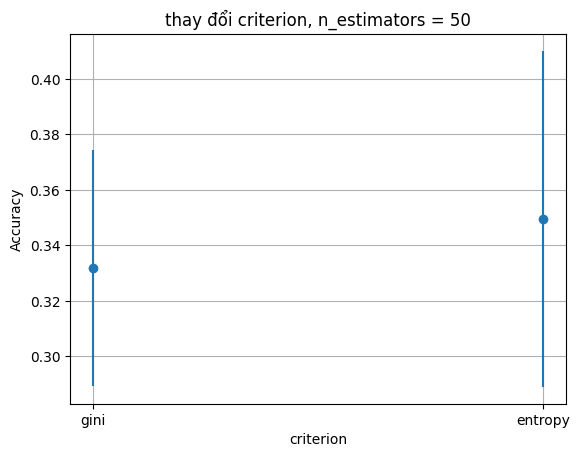

In [ ]:
# làm tương tự với SVM giúp tớ nhé
title = "thay đổi criterion, n_estimators = 50"
xlabel = "criterion"
X = []
Y = []
error = []

for criterion in tqdm(["gini", "entropy"]):
    # Với mỗi criterion nhận được,
    # thực hiện xây dựng mô hình, huấn luyện và đánh giá theo cross-validation
    rf_clf = RandomForestClassifier(criterion=criterion, n_estimators=50)
    mean, std = cross_validation(rf_clf)
    X.append(str(criterion))
    Y.append(mean)
    error.append(std)

# lưu kết quả ra file ảnh
plot(title, xlabel, X, Y, error)
plt.savefig('/content/drive/MyDrive/MachineLearning/Images/RF_change_criterion.png', bbox_inches='tight') #để ý giúp tớ, là nếu mà có chạy nhiều lần thì nhớ là lưu 1 ảnh thôi
plt.show()


100%|██████████| 4/4 [09:24<00:00, 141.22s/it]


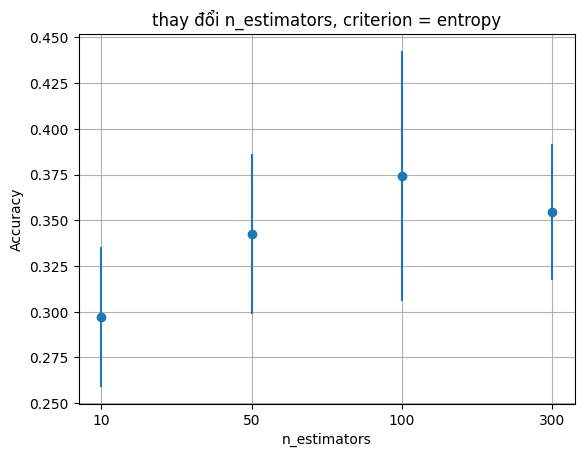

In [ ]:
title = "thay đổi n_estimators, criterion = entropy"
xlabel = "n_estimators"
X = []
Y = []
error = []

for n_estimators in tqdm([10, 50, 100, 300]):
    # Với từng giá trị n_estimators nhận được,
    # thực hiện xây dựng mô hình, huấn luyện và đánh giá theo cross-validation
    rf_clf = RandomForestClassifier(criterion='entropy', n_estimators=n_estimators)
    mean, std = cross_validation(rf_clf)
    X.append(str(n_estimators))
    Y.append(mean)
    error.append(std)

# lưu kết quả ra file ảnh
plot(title, xlabel, X, Y, error)
plt.savefig('/content/drive/MyDrive/MachineLearning/Images/RF_change_N.png', bbox_inches='tight')
plt.show()


In [ ]:
# làm tương tự với SVM giúp tớ
_rf_clf = RandomForestClassifier(criterion='entropy', n_estimators=100)
_rf_clf.fit(train_data, train_labels)
# result of prediction on test set
print(f'RF: {accuracy_score(test_labels, _rf_clf.predict(test_data))}')

RF: 0.15


### K-Nearest Neighbors
1. Thay đổi giá trị của K

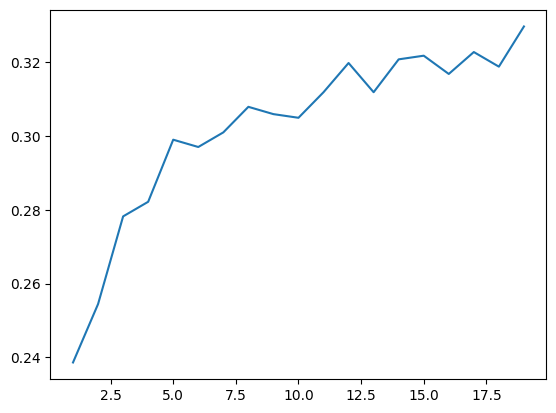

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

title = "Change K"
xlable = "K"
k_range = range(0, 20)
X = []
Y = []
error = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    mean, std = cross_validation(knn)
    X.append(str(k))
    Y.append(mean)
    error.append(std)

plt.plot(list(map(int, X)), Y)
plt.savefig('/content/drive/MyDrive/MachineLearning/Images/KNN_change_K.png', bbox_inches='tight')

In [ ]:
_knn_clf = KNeighborsClassifier(n_neighbors=19)
_knn_clf.fit(train_data, train_labels)
# result of prediction on test set
print(f'KNN: {accuracy_score(test_labels, _knn_clf.predict(test_data))}')

KNN: 0.17
